In [1]:
import pandas as pd
import sklearn
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("HW2_house-prices.csv")

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
# Fill the missing data and check if the data type is string or numeric value
for column in df.columns:
    if df[column].dtypes != "int64" and df[column].dtypes != "float64":  # Check which columms are not number
        if df[column].isnull().values.any():
            print(f"[{column}] data type: {df[column].dtypes}, missing some data")
            df[column].fillna(df[column].mode()[0], inplace=True) # Fill NaNs with the most frequent data
        else:
            print(f"[{column}] data type: {df[column].dtypes}")
    else:
        if df[column].isnull().values.any():
            print(f"[{column}] data type: {df[column].dtypes}, missing some data")
            df[column].fillna(df[column].mean(), inplace=True) # Fill NaNs with mean of data

[MSZoning] data type: object
[LotFrontage] data type: float64, missing some data
[Street] data type: object
[Alley] data type: object, missing some data
[LotShape] data type: object
[LandContour] data type: object
[Utilities] data type: object
[LotConfig] data type: object
[LandSlope] data type: object
[Neighborhood] data type: object
[Condition1] data type: object
[Condition2] data type: object
[BldgType] data type: object
[HouseStyle] data type: object
[RoofStyle] data type: object
[RoofMatl] data type: object
[Exterior1st] data type: object
[Exterior2nd] data type: object
[MasVnrType] data type: object, missing some data
[MasVnrArea] data type: float64, missing some data
[ExterQual] data type: object
[ExterCond] data type: object
[Foundation] data type: object
[BsmtQual] data type: object, missing some data
[BsmtCond] data type: object, missing some data
[BsmtExposure] data type: object, missing some data
[BsmtFinType1] data type: object, missing some data
[BsmtFinType2] data type: 

In [5]:
# Label encoding
numeric_data_list = []

label_encoder = LabelEncoder()
df_label_encoding = df.copy()
for column in df_label_encoding.columns:
    if df_label_encoding[column].dtypes == "O":
        df_label_encoding[column] = label_encoder.fit_transform(df_label_encoding[column])
    else:
        numeric_data_list.append(column)

df_label_encoding

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,2,2,2,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,2,2,2,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,2,2,2,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,2,2,2,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,2,2,2,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,0,3,3,0,...,0,2,2,2,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,0,3,3,0,...,0,2,2,2,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,0,3,3,0,...,0,2,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,0,3,3,0,...,0,2,2,2,0,4,2010,8,4,142125


In [6]:
# Label encoding with normalization
scaler = StandardScaler()

df_label_encoding_sc = df_label_encoding.copy()
df_label_encoding_sc[numeric_data_list[1:]] = scaler.fit_transform(df_label_encoding_sc[numeric_data_list[1:]])
df_label_encoding_sc

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,0.073375,3,-0.229372,-0.207142,1,0,3,3,0,...,-0.068692,2,2,2,-0.087688,-1.599111,0.138777,8,4,0.347273
1,2,-0.872563,3,0.451936,-0.091886,1,0,3,3,0,...,-0.068692,2,2,2,-0.087688,-0.489110,-0.614439,8,4,0.007288
2,3,0.073375,3,-0.093110,0.073480,1,0,0,3,0,...,-0.068692,2,2,2,-0.087688,0.990891,0.138777,8,4,0.536154
3,4,0.309859,3,-0.456474,-0.096897,1,0,0,3,0,...,-0.068692,2,2,2,-0.087688,-1.599111,-1.367655,8,0,-0.515281
4,5,0.073375,3,0.633618,0.375148,1,0,0,3,0,...,-0.068692,2,2,2,-0.087688,2.100892,0.138777,8,4,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0.073375,3,-0.365633,-0.260560,1,0,3,3,0,...,-0.068692,2,2,2,-0.087688,0.620891,-0.614439,8,4,-0.074560
1456,1457,-0.872563,3,0.679039,0.266407,1,0,3,3,0,...,-0.068692,2,2,2,-0.087688,-1.599111,1.645210,8,4,0.366161
1457,1458,0.309859,3,-0.183951,-0.147810,1,0,3,3,0,...,-0.068692,2,0,2,4.953112,-0.489110,1.645210,8,4,1.077611
1458,1459,-0.872563,3,-0.093110,-0.080160,1,0,3,3,0,...,-0.068692,2,2,2,-0.087688,-0.859110,1.645210,8,4,-0.488523


In [7]:
# One hot encoding
one_hot_list = []
for column in df.columns:
    if df[column].dtypes == "O":
        one_hot_list.append(column)
df_one_hot_encoding = pd.get_dummies(df, columns = one_hot_list)
df_one_hot_encoding

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [8]:
# One hot encoding with normalization
scaler = StandardScaler()

df_one_hot_encoding_sc = df_one_hot_encoding.copy()
df_one_hot_encoding_sc[numeric_data_list[1:]] = scaler.fit_transform(df_one_hot_encoding_sc[numeric_data_list[1:]])
df_one_hot_encoding_sc

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,...,0,0,0,1,0,0,0,0,1,0
1,2,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,...,0,0,0,1,0,0,0,0,1,0
2,3,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,...,0,0,0,1,0,0,0,0,1,0
3,4,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,...,0,0,0,1,1,0,0,0,0,0
4,5,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,...,0,0,0,1,0,0,0,0,1,0
1456,1457,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,...,0,0,0,1,0,0,0,0,1,0
1457,1458,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,...,0,0,0,1,0,0,0,0,1,0
1458,1459,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,...,0,0,0,1,0,0,0,0,1,0


One hot encoding vs Label encoding:
 * Label encoding較容易閱讀，且不會占用額外的記憶體，但是可能在判斷時會影響結果，eg:假設其中一個參數是三個不同城市(東京、台北、北京)，經過編碼完變成0, 1, 2，模型有可能認為2和0的差距比2和1的還大，但事實上三個城市的差距並沒有不一樣。
 * One hot encoding能夠解決label encoding的問題，但會增加額外的記憶體，且會使資料比較難閱讀。

In [9]:
def draw_scatter_plot(pred_price):
    plt.scatter(y_test.to_numpy(), pred_price, s=10)
    plt.xlabel("Real price")
    plt.ylabel("Predicted price")
    plt.show()

In [10]:
# Linear regression
def linear():
    linear_reg = linear_model.LinearRegression()
    linear_reg.fit(x_train, y_train)

    pred_price_linear = linear_reg.predict(x_test)

    mse = np.sum(np.square(pred_price_linear - y_test.to_numpy())) / len(y_test)
    score = linear_reg.score(x_test, y_test)
    print("Linear regression:")
    print(f"    Mean square error: {mse}")
    print(f"    Model score: {score}")

    draw_scatter_plot(pred_price_linear)

In [11]:
# Ridge regression
def ridge():
    ridge_reg = linear_model.Ridge(alpha=0.01, random_state=1)
    ridge_reg.fit(x_train, y_train)

    pred_price_ridge = ridge_reg.predict(x_test)

    mse = np.sum(np.square(pred_price_ridge - y_test.to_numpy())) / len(y_test)
    score = ridge_reg.score(x_test, y_test)
    print("Ridge regression:")
    print(f"    Mean square error: {mse}")
    print(f"    Model score: {score}")

    draw_scatter_plot(pred_price_ridge)

In [12]:
# Lasso regression
def lasso():
    lasso_reg = linear_model.Lasso(alpha=0.01, random_state=1, max_iter=10000, tol=1e-6)
    lasso_reg.fit(x_train, y_train)

    pred_price_lasso = lasso_reg.predict(x_test)

    mse = np.sum(np.square(pred_price_lasso - y_test.to_numpy())) / len(y_test)
    score = lasso_reg.score(x_test, y_test)
    print("Lasso regression:")
    print(f"    Mean square error: {mse}")
    print(f"    Model score: {score}")

    draw_scatter_plot(pred_price_lasso)

In [13]:
def pred_all():
    linear()
    ridge()
    lasso()

Linear regression:
    Mean square error: 1090559155.738846
    Model score: 0.847267100174572


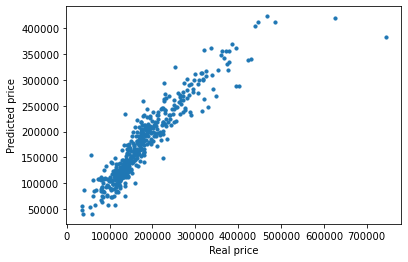

Ridge regression:
    Mean square error: 1090826113.239128
    Model score: 0.8472297127546107


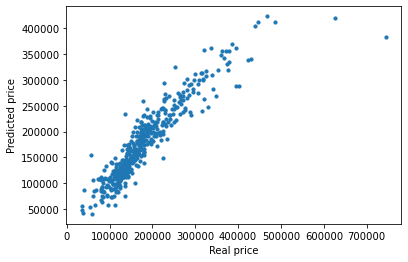

Lasso regression:
    Mean square error: 1090567677.2349339
    Model score: 0.8472659067383411


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53150293553.77063, tolerance: 6079546.941504301
  model = cd_fast.enet_coordinate_descent(


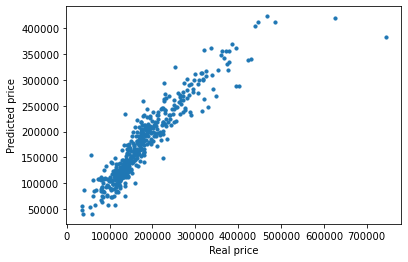

In [14]:
# Training data (Label encoded)
y = df_label_encoding["SalePrice"]
x = df_label_encoding.drop(columns=["SalePrice"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
pred_all()

Linear regression:
    Mean square error: 6.527059831552726e+18
    Model score: -914115267.4484388


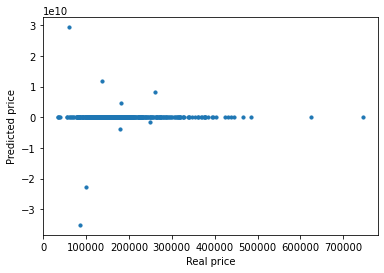

Ridge regression:
    Mean square error: 888903129.2549103
    Model score: 0.8755090433374794


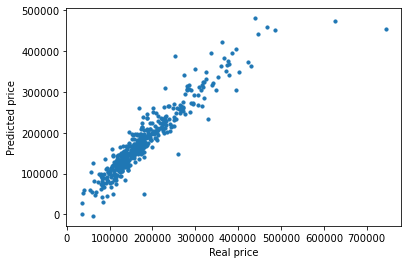

Lasso regression:
    Mean square error: 866633945.1522795
    Model score: 0.8786278444101611


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186856385525.23132, tolerance: 6079546.941504301
  model = cd_fast.enet_coordinate_descent(


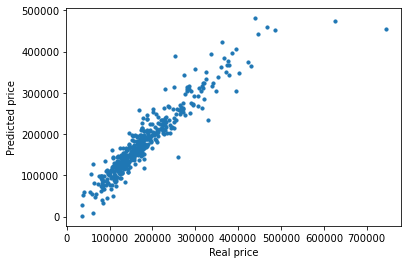

In [30]:
# Training data (One hot encoded)
y = df_one_hot_encoding["SalePrice"]
x = df_one_hot_encoding.drop(columns=["SalePrice"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
pred_all()

在兩種不同編碼方式的情況下3種回歸演算法的準確率差異不大，但利用one hot encoding時linear regression算出來的coefficient有時候會不穩定，導致mse loss爆炸的情形，且利用lasso算出來的結果也偶爾會無法converge

Linear regression:
    Mean square error: 0.17291829922322066
    Model score: 0.8472671001745472


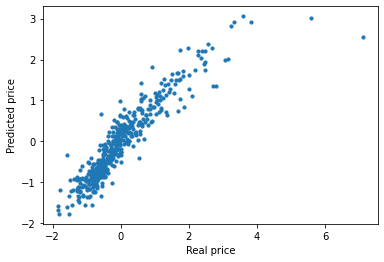

Ridge regression:
    Mean square error: 0.17296231704721612
    Model score: 0.8472282207156754


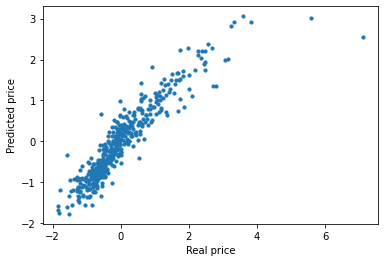

Lasso regression:
    Mean square error: 0.17130696289439884
    Model score: 0.8486903391908953


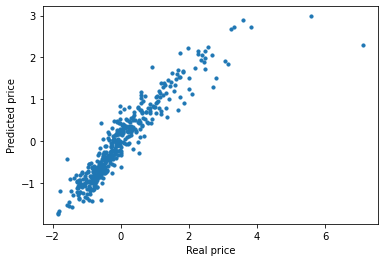

In [16]:
# Training data (Label encoded with noralization)
y = df_label_encoding_sc["SalePrice"]
x = df_label_encoding_sc.drop(columns=["SalePrice"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
pred_all()

Linear regression:
    Mean square error: 0.14162859394274652
    Model score: 0.8749042412037995


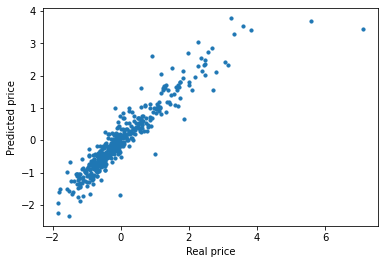

Ridge regression:
    Mean square error: 0.14094118528833613
    Model score: 0.8755114060766027


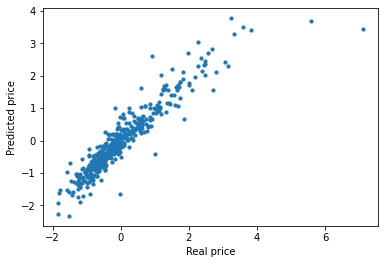

Lasso regression:
    Mean square error: 0.15259585004731682
    Model score: 0.8652172338974352


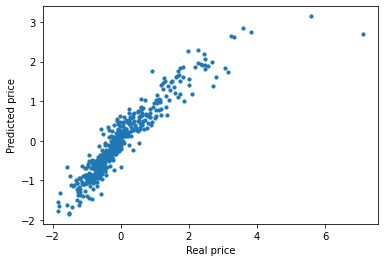

In [36]:
# Training data (One hot encoded with normalization)
y = df_one_hot_encoding_sc["SalePrice"]
x = df_one_hot_encoding_sc.drop(columns=["SalePrice"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
pred_all()

將資料進行標準化之後Lasso regression預測出來的結果就能夠converge，且One hot encoded的資料利用Linear regression時也不會有coefficient爆炸的情形，能夠大幅提高準確率，而在利用ridge regression時沒有太大的差異。

<AxesSubplot:>

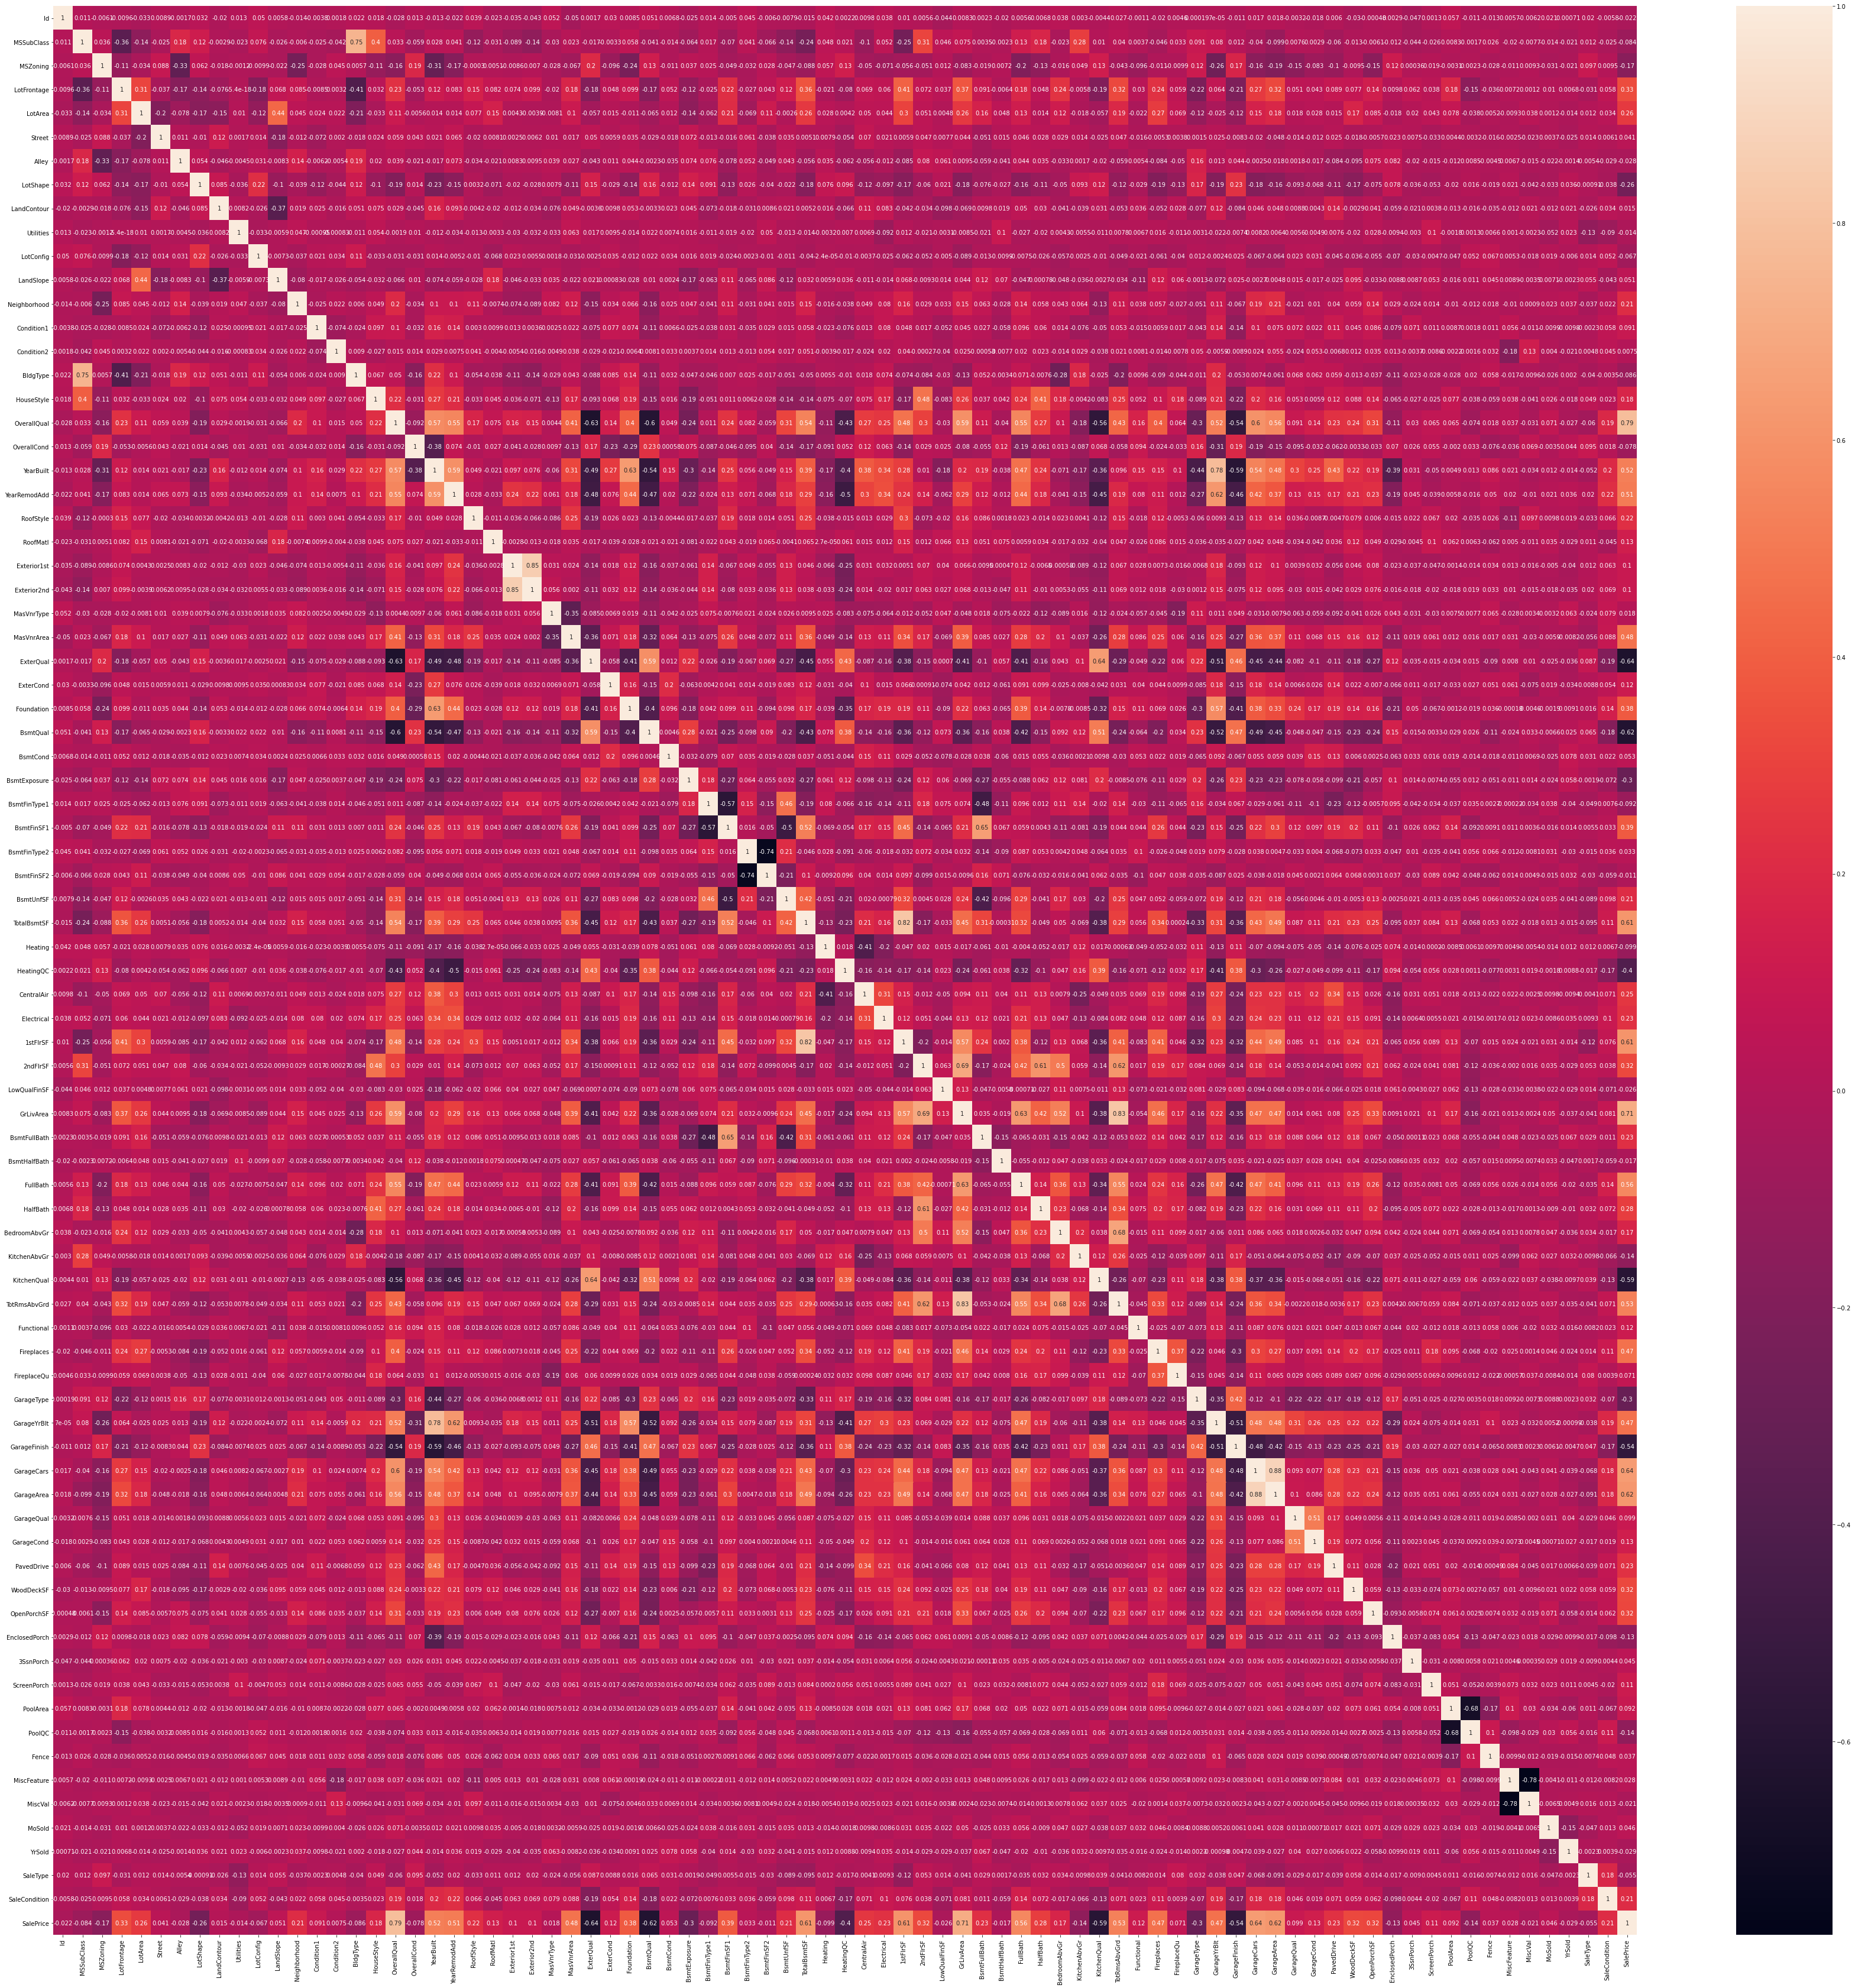

In [18]:
# Draw correlation map
correlation_matrix = df_label_encoding.corr()
plt.figure(figsize=(60, 60))
sns.heatmap(correlation_matrix, annot=True)

Linear regression:
    Mean square error: 0.24082595767602114
    Model score: 0.7872865565163902


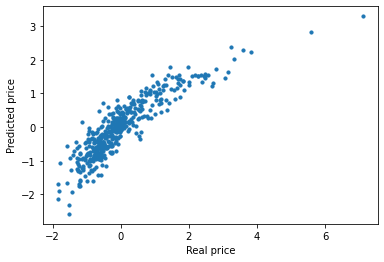

Ridge regression:
    Mean square error: 0.24082678436057284
    Model score: 0.7872858263338162


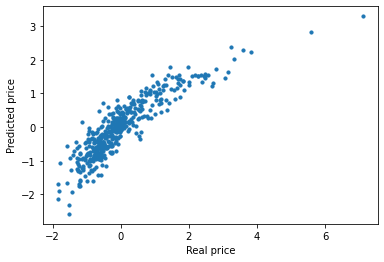

Lasso regression:
    Mean square error: 0.24288652075214864
    Model score: 0.7854665306700572


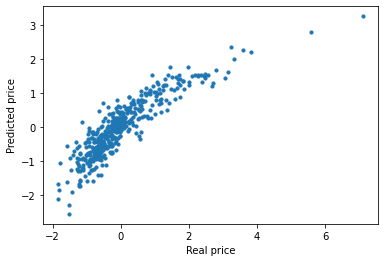

In [19]:
# Predict using the four most correlated attributes (with SalePrice)
Top4H = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']

y = df_label_encoding_sc["SalePrice"]
x = df_label_encoding_sc[Top4H]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
pred_all()

Linear regression:
    Mean square error: 0.39357199384319824
    Model score: 0.6523711360810982


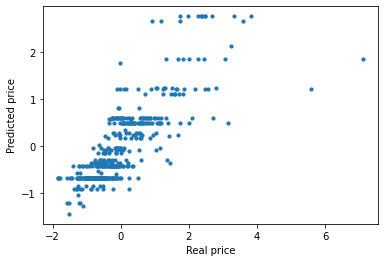

Ridge regression:
    Mean square error: 0.39356391998952234
    Model score: 0.6523782674436562


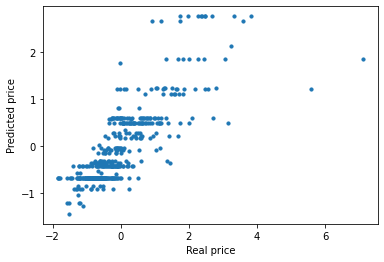

Lasso regression:
    Mean square error: 0.4173952604227717
    Model score: 0.6313288484553334


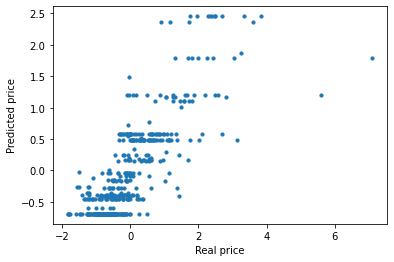

In [20]:
# Predict using the four least correlated attributes (with SalePrice)
Top4L = ['ExterQual', 'BsmtQual', 'KitchenQual', 'GarageFinish']

Top4L_encoded = []
for column_name in Top4L:
    for value in df[column_name].unique(): 
        Top4L_encoded.append(f"{column_name}_{value}")
del Top4L

y = df_one_hot_encoding_sc["SalePrice"]
x = df_one_hot_encoding_sc[Top4L_encoded]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
pred_all()

僅用前四高係數之特徵進行預測的model score有0.787，和使用全部的特徵預測相比少了大約9個百分點，而使用前四低係數之特徵進行預測的model score只有0.65，遠不及理想的準確度。

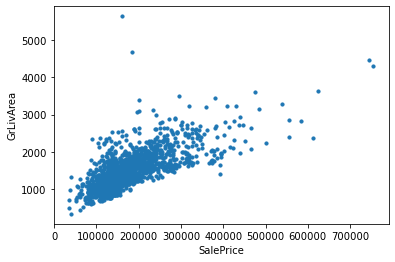

In [21]:
# Correlation between GrLivArea and SalePrice
plt.scatter(df['SalePrice'], df['GrLivArea'], s=10)
plt.xlabel("SalePrice")
plt.ylabel("GrLivArea")
plt.show()

After removing the outliers:


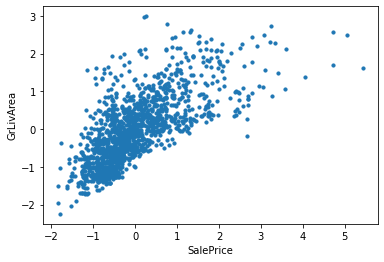

In [25]:
# Remove the outliers based on z-score
df_remove_outliers = df_one_hot_encoding_sc[(np.abs(stats.zscore(df['GrLivArea'])) < 3)]
print("After removing the outliers:")
plt.scatter(df_remove_outliers['SalePrice'], df_remove_outliers['GrLivArea'], s=10)
plt.xlabel("SalePrice")
plt.ylabel("GrLivArea")
plt.show()

Linear regression:
    Mean square error: 0.08830351740720858
    Model score: 0.8976377588204882


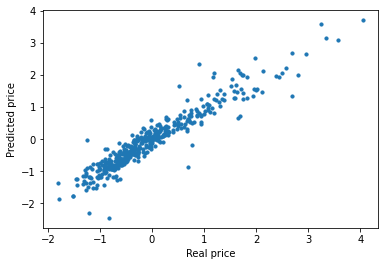

Ridge regression:
    Mean square error: 0.08758674375429445
    Model score: 0.8984686493635271


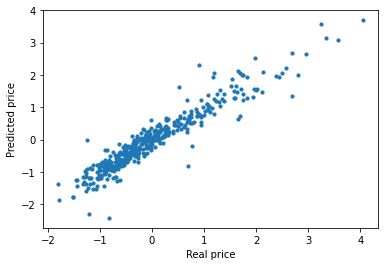

Lasso regression:
    Mean square error: 0.08569352979337495
    Model score: 0.9006632802203977


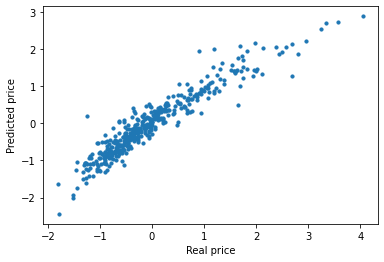

In [26]:
# Predict after removing the outliers
y = df_remove_outliers["SalePrice"]
x = df_remove_outliers.drop(columns=["SalePrice"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
pred_all()

把極端值替除掉之後的model score和原本相比高上了2到3個百分點，且散佈圖的分布也較趨近於一條直線